# UNIVERSIDAD POLITECNICA SALESIANA

## Examen Inteligencia Artificial

### Narcisa Araujo

### Enunciado:

- Diseñe y desarrolle un sistema recopilador que permita obtener las noticias o facebook de los candidatos y almacenar dentro de una base de datos orientados a grafos:
  Webscraping es la técnica de extraer datos contenidos en un formato no estructurado en una página web y llevarlos a una estructura fácil de usar.
  Es por ello, que se desea crear nuevos métodos que permitan la recopilación masiva de informaciones para su posterior estudio y correlación en forma de big data.
  En base a ello, vamos a obtener los datos de lo que esta hablando las noticias de los candidatos dentro del Ecuador y almacenar los datos dentro de una base de datos orientadas a grafos.
https://www.google.com/search?tbm=nws&sxsrf=ALeKk01Q48xyd7421N_rrjzDN56Mnp8FTg:1607467777701&q=candidatos+ecuador&spell=1&sa=X&ved=0ahUKEwioo4KPvL_tAhXFrFkKHXv8CC8QBQgvKAA&biw=1920&bih=915&dpr=1
- Generar un modelo que permita obtener y almacenar los datos en los grafos.
- Vincular los datos con el candidato seleccionado.
- Se debe tener al menos 1000 nodos generados, en caso de tener estos datos seleccionar al partido (UNES) (UNES AZUAY) (Candidato Presidencial)
- Obtener de la noticia: el Link, mensaje, fecha
- Facebook: Comentarios, Publicaciones, Amigos, Likes, Seguidores, etc.
- No se debe repetir los candidatos a asambleístas dentro del Foro del partido político de UNES AZUAY (10 primeros) .
- Se puede utilizar cualquier herramienta o procesamiento para el WebScarping.
- Generar sus análisis, conclusiones y recomendaciones en base a  los datos


In [8]:
from neo4j import GraphDatabase

class Neo4jService(object):

    def __init__(self, uri, user, password):
        self._driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self._driver.close()      
    
    def crear_cabecera(self, tx, nombre):
        tx.run("CREATE (:Cabecera {nombre: $nombre})", nombre=nombre)
    
    def crear_candidato(self, tx, nombre):
        tx.run("CREATE (:Candidato {nombre: $nombre})", nombre=nombre)

    def crear_noticias(self, tx, nombre):
        tx.run("CREATE (:Noticias {nombre: $nombre})", nombre=nombre)
    
    def crear_links(self, tx, nombre):
        tx.run("CREATE (:Links {nombre: $nombre})", nombre=nombre)
        
    def crear_contenido(self, tx, nombre):
        tx.run("CREATE (:Contenido {nombre: $nombre})", nombre=nombre)
        
    def crear_titulo(self, tx, nombre):
        tx.run("CREATE (:Titulo {nombre: $nombre})", nombre=nombre)

    def crear_fecha(self, tx, nombre):
        tx.run("CREATE (:Fecha {nombre: $nombre})", nombre=nombre)
        
    def crear_relacion_noticia(self, tx, nombre_noticias, nombre_noticia):
        tx.run("MATCH (a:Noticias {nombre: $nombre_noticias}) "
               "MATCH (b:Contenido {nombre: $nombre_noticia}) "
               "MERGE (a)-[:Noticias]->(b)",
               nombre_noticias=nombre_noticias, nombre_noticia=nombre_noticia)
    
    def crear_relacion_cabeceras(self, tx, nombre_cabecera, nombre_titulo):
        tx.run("MATCH (a:Cabecera {nombre: $nombre_cabecera}) "
               "MATCH (b:Titulo {nombre: $nombre_titulo}) "
               "MERGE (a)-[:TituloNoticia]->(b)",
               nombre_cabecera=nombre_cabecera, nombre_titulo=nombre_titulo)
    
    def crear_relacion_fecha(self, tx, nombre_links, nombre_fecha):
        tx.run("MATCH (a:Links {nombre: $nombre_links}) "
               "MATCH (b:Fecha {nombre: $nombre_fecha}) "
               "MERGE (a)-[:Fecha]->(b)",
               nombre_links=nombre_links, nombre_fecha=nombre_fecha)

    #relacion de candidato   cabecera links noticias 
    def crear_relacion_candidato_titulo(self, tx, nombre_candidato, nombre_titulo):
        tx.run("MATCH (a:Candidato {nombre: $nombre_candidato}) "
               "MATCH (b:Cabecera {nombre: $nombre_titulo}) "
               "MERGE (a)-[:Candidato_Titulo]->(b)",
               nombre_candidato=nombre_candidato, nombre_titulo=nombre_titulo)
        
    def crear_relacion_candidato_fecha(self, tx, nombre_candidato, nombre_fecha):
        tx.run("MATCH (a:Candidato {nombre: $nombre_candidato}) "
               "MATCH (b:Links {nombre: $nombre_fecha}) "
               "MERGE (a)-[:Candidato_Fecha]->(b)",
               nombre_candidato=nombre_candidato, nombre_fecha=nombre_fecha)
    
    def crear_relacion_candidato_contenido(self, tx, nombre_candidato, nombre_noticias):
        tx.run("MATCH (a:Candidato {nombre: $nombre_candidato}) "
               "MATCH (b:Noticias {nombre: $nombre_noticias}) "
               "MERGE (a)-[:Candidato_Noticias]->(b)",
               nombre_candidato=nombre_candidato, nombre_noticias=nombre_noticias)
        
print("ejecucion correcta")

ejecucion correcta


In [14]:
import requests
from bs4 import BeautifulSoup

neo4j = Neo4jService('bolt://localhost:7687', 'neo4j', 'examenneo4j')
with neo4j._driver.session() as session:

    session.write_transaction(neo4j.crear_candidato , "Candidato")
    session.write_transaction(neo4j.crear_cabecera , "Titulos")
    session.write_transaction(neo4j.crear_links , "Fecha")
    session.write_transaction(neo4j.crear_noticias , "Noticias")
            
with open("C:/Users/narcisa/Documents/9no/deberes quisi/DEBERES-SE-IA/IA/Examen IA/Asambleista.txt","r") as archivo:
        
    for linea in archivo:
        print(linea)

        page = requests.get(linea)
        soup = BeautifulSoup(page.content,'html.parser')
        #print(soup.prettify())
        
        #titulos
        titulos =soup.find_all("div",{"class":"BNeawe vvjwJb AP7Wnd"})
        #Contenido
        contenidohtml =soup.find_all("div",{"class":"BNeawe s3v9rd AP7Wnd"})
        #Fecha
        fecha =soup.find_all("span",{"class":"r0bn4c rQMQod"})
        
        print("resultado de la busqueda links ")
        a=0

        tituloNeo=list()
        for i in titulos:
            tituloNeo.append(i.text)

        descripcion=list()
        for i in contenidohtml:
            descripcion.append(i.text)
            #print(link)
            
#descripcion filtrada
        descripcionAux=list()    
        for elemento in descripcion:
            if((a%2)==0):
                descripcionAux.append(descripcion[a])
            a=a+1
            

        fechaNeo=list()
        for i in fecha:
            fechaNeo.append(i.text)

        
            
        print("Titulo")
        for elemento in tituloNeo:
            session.write_transaction(neo4j.crear_titulo , elemento)
            print(elemento)
            
        #Descripcion print("descripcion")
        for elemento1 in descripcionAux:
            session.write_transaction(neo4j.crear_contenido , elemento1)
            print(elemento1)
        
        
        print("fecha")
        for elemento2 in fechaNeo:
            session.write_transaction(neo4j.crear_fecha , elemento2)
            print(elemento2)
            

#relaciones
        #relacion de descripcion
        for total in descripcionAux:
            session.write_transaction(neo4j.crear_relacion_noticia, "Noticias", total)  
            
        #relacion de Fecha               
        for date in fechaNeo:
            session.write_transaction(neo4j.crear_relacion_fecha, "Fecha", date)  
        
        #relacion de Titulo  
        for titul in tituloNeo:
            session.write_transaction(neo4j.crear_relacion_cabeceras, "Titulos", titul) 
            
            
session.write_transaction(neo4j.crear_relacion_candidato_titulo, "Candidato", "Titulos")
session.write_transaction(neo4j.crear_relacion_candidato_contenido, "Candidato", "Noticias")
session.write_transaction(neo4j.crear_relacion_candidato_fecha, "Candidato", "Fecha")
print("fin del proceso")

https://www.google.com/search?ei=pQXiX-LRCsqp5wLGx6H4BA&q=candidato+a+asambleista+unes+Juan+Crist%C3%B3bal+Lloret&oq=candidato+a+asambleista+unes+Juan+Crist%C3%B3bal+Lloret&gs_lcp=CgZwc3ktYWIQAzoECCEQClCbRFipbGD-eWgAcAB4AIABjwGIAboGkgEDMC42mAEAoAEBqgEHZ3dzLXdpesABAQ&sclient=psy-ab&ved=0ahUKEwiiuI6V6eHtAhXK1FkKHcZjCE8Q4dUDCA0&uact=5

resultado de la busqueda links 
Titulo
Listado general de asambleístas - Observatorio Legislativo
Juan Cristóbal Lloret Valdivieso - Observatorio Legislativo
Listado de candidatos inscritos - Movimiento Centro Democrático
Correismo: ya hay candidatos a asambleístas en Azuay | Diario El ...
Anexo:Candidatos para las elecciones legislativas de Ecuador de ...
Con las candidaturas de Centro Democrático-UNES se marca un ...
39 asambleístas que buscan la reelección ya adelantan campaña
Con el asambleísta Juan Cristóbal Lloret, candidato a la ... - Facebook
Ing. Juan Cristóbal Lloret - Asambleísta por el Azuay | Antena Uno ...
Unes presenta a sus candidatos a la A

https://www.google.com/search?q=candidato+a+asambleista+unes+2021+Juan+Crist%C3%B3bal+Lloret&ei=8wniX8mVLer25gKe0J6IBg&start=10&sa=N&ved=2ahUKEwiJ2-2i7eHtAhVqu1kKHR6oB2EQ8NMDegQIBBBD&biw=1259&bih=698

resultado de la busqueda links 
Titulo
El Vocero Azuay - La Hora Política | Facebook
Corporación Juventud Independiente - Posts | Facebook
Ecuador: Centro Democrático ratifica a Rafael Correa como ... - Nodal
Delegado del CNE avala la candidatura de Andrés Arauz y Rafael ...
Y cómo son las elecciones en tu país? — Pues ... - YouTube
El movimiento Centro Democrático ... - MaSHaRoSNeWS.CoM
Asamblea Nacional aceptó la renuncia de María Alejandra Vicuña ...
Romo: 'No es el momento para juicios políticos, sino para enfrentar ...
Se avizora camino complejo para el proyecto económico del ...
agosto 2020 – Página 2 – Prensa Digital República del Banano
19 nov. 2020 · Entrevista. Candidato a Asambleísta por el #Azuay, Ing. Juan Cristóbal Lloret. 12 12 ...Duración: 46:58
Publicado: 19 nov. 2020
#vo

https://www.google.com/search?q=candidato+a+asambleista+unes+2021+Juan+Crist%C3%B3bal+Lloret&ei=LAriX_nALqXI5gLs2pK4AQ&start=40&sa=N&ved=2ahUKEwj5hoa-7eHtAhUlpFkKHWytBBc4HhDy0wN6BAgOED8&biw=1259&bih=698

resultado de la busqueda links 
Titulo
Bitty Browser Configuration
#arauz Photos,Videos,Stories - Hashtag | picboon.com
[PDF] Josep Claret : arquitectura i societat - UdG
Josep Claret Rubira_Arquitectura i Societat - Scribd
Radio Station of #PuntoNoticias | Augusto Tandazo - Monetización ...
Roque Ordoñez @RoqueOrdone Timeline, The Visualized Twitter ...
Radio La Calle
CHEPSODIA ECUADOR - UKburn
clouddrive/Sibirskaia - Recherche - PDF Free Download
#PuntoNoticias | Gabriela Rivadeneira | ¿Es posible un proceso ...
Where maskinstation konkurs glass cutting blade wet saw renard john freeman 60w istick kit white/grey ghostfacers logo yudhveer singh shaktawat china teeth ...
Photo shared by Juan Cristóbal Lloret on October 05, 2020 tagging ... UNES señaló mediante un boletín de prensa que 

https://www.google.com/search?q=Candidato+a+asambleista+lista+UNES+juan+crist%C3%B3bal+lloret&rlz=1C1GCEB_enEC884EC884&hl=es&sxsrf=ALeKk012AknliNSTwV58cRyVlp0jPai0LA:1608650019235&ei=Iw3iX-brDYjI5gKcv62QCg&start=10&sa=N&ved=2ahUKEwimidun8OHtAhUIpFkKHZxfC6IQ8tMDegQIBRA6&biw=1536&bih=698

resultado de la busqueda links 
Titulo
Ecuador: Centro Democrático ratifica a Rafael Correa como ... - Nodal
Correísmo toma las mejores posiciones en las listas de Centro ...
#Entrevista: Asambleísta por el Azuay - Ing. Juan Cristóbal Lloret ...
90 candidatos buscan las curules azuayas; en Junta Provincial no ...
El movimiento Centro Democrático ... - MaSHaRoSNeWS.CoM
En Azuay se aprobaron 180 candidatos para 5 curules en la ...
Juan Cristóbal Lloret y Lira Villalba insistirán en reconsideración ...
Asambleísta Juan Cristóbal Lloret alerta desaceleración económica ...
Primera Plana ECU - AMget
23 ago. 2020 · El candidato presidencial, de 35 años, explicó que serán un ... que es parte de la coalición Uni

fin del proceso


## Total Nodos

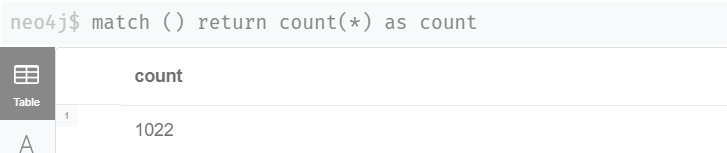

## Neo4j

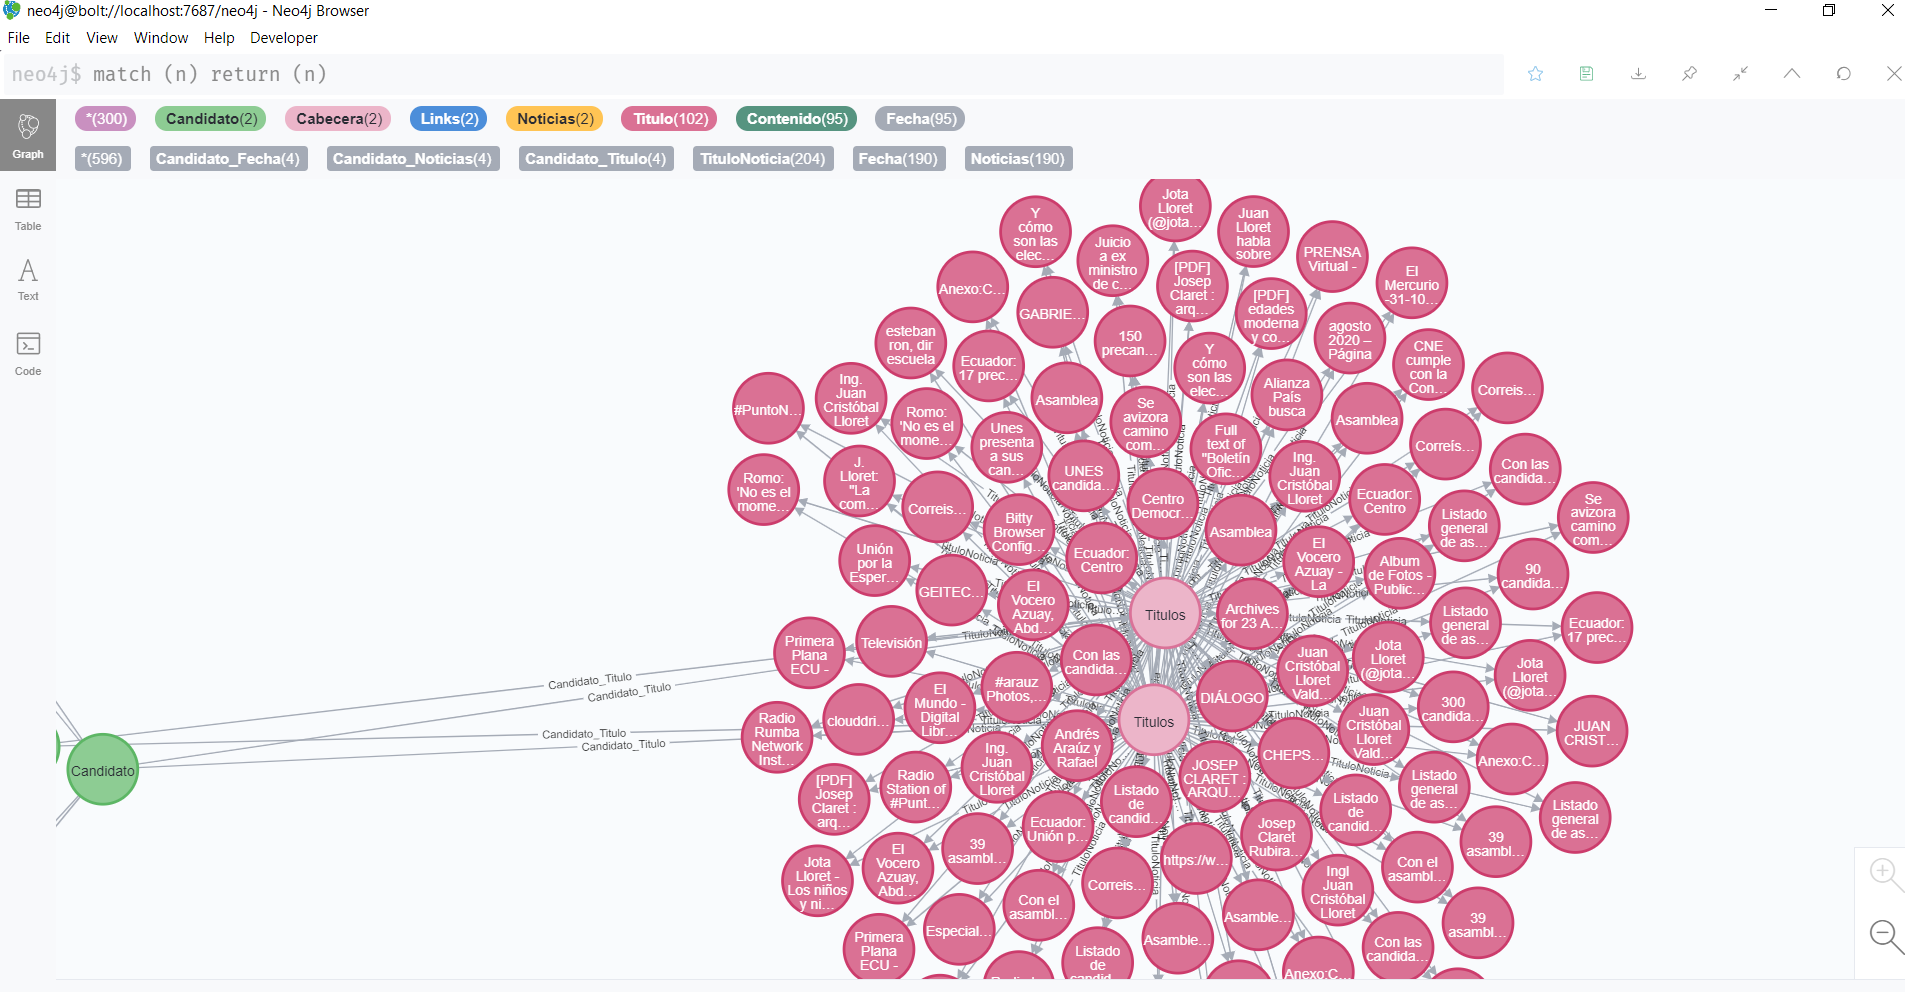